# Real estate price

In [490]:
import pandas as pd
url = 'https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/refs/heads/main/Real%20estate.csv'
df = pd.read_csv(url)
import warnings
warnings.filterwarnings("ignore")

In [491]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [492]:
df = df.drop(['No','X5 latitude','X6 longitude'], axis=1)
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012.917,32.0,84.87882,10,37.9
1,2012.917,19.5,306.59470,9,42.2
2,2013.583,13.3,561.98450,5,47.3
3,2013.500,13.3,561.98450,5,54.8
4,2012.833,5.0,390.56840,5,43.1


In [493]:
df['X1 transaction date'] = df['X1 transaction date'].astype(str).str.extract(r'^(\d{4})')[0]
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012,32.0,84.87882,10,37.9
1,2012,19.5,306.59470,9,42.2
2,2013,13.3,561.98450,5,47.3
3,2013,13.3,561.98450,5,54.8
4,2012,5.0,390.56840,5,43.1


In [494]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 5 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    object 
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   Y house price of unit area              414 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 16.3+ KB


In [495]:
df['X1 transaction date'] = df['X1 transaction date'].astype(int)
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012,32.0,84.87882,10,37.9
1,2012,19.5,306.59470,9,42.2
2,2013,13.3,561.98450,5,47.3
3,2013,13.3,561.98450,5,54.8
4,2012,5.0,390.56840,5,43.1


In [496]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 5 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    int64  
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   Y house price of unit area              414 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 16.3 KB


### Dataset Explanation

1. **X1 transaction date** (`int32`):  
   - Represents the year of the transaction, indicating when the real estate sale occurred.  
   - Example: 2012 or 2013.

2. **X2 house age** (`float64`):  
   - The age of the house in years at the time of the transaction.  
   - Example: 32.0 means the house is 32 years old.

3. **X3 distance to the nearest MRT station** (`float64`):  
   - The distance from the house to the nearest MRT station, measured in meters.  
   - Example: 84.87882 meters.

4. **X4 number of convenience stores** (`int64`):  
   - The number of convenience stores within a certain vicinity of the house.  
   - Example: 10 means there are 10 convenience stores nearby.

5. **Y house price of unit area** (`float64`):  
   - The price per unit area (e.g., per square meter) of the house during the transaction.  
   - Example: 37.9 means 37.9 currency units per square meter.


# Continue....

### Steps for Regression Analysis

#### **1. Split the Dataset**
- Split the data into **training (70%)** and **testing (30%)** subsets.
- Use the `train_test_split` function to ensure randomness in the split.
- Define:
  - **Features (X)**: `X1 transaction date`, `X2 house age`, `X3 distance to the nearest MRT station`, `X4 number of convenience stores`.
  - **Target (Y)**: `Y house price of unit area`.

#### **2. Check Correlation**
- Compute the correlation matrix to understand the relationships between features and the target variable.
- Visualize the correlation matrix using a **heatmap**:
  - Strong correlations between features and the target suggest potential predictors.
  - Identify multicollinearity (strong correlations between features), which might affect regression models.

#### **3. Apply Regression Models**

**a. Linear Regression**
1. Train a **Linear Regression** model using the training data.
2. Predict the target values using the testing data.

**b. Polynomial Regression**
1. Use `PolynomialFeatures` to generate polynomial terms for the features (e.g., degree = 2 or 3).
2. Train a **Linear Regression** model on the transformed polynomial features.
3. Predict the target values using the transformed testing data.

#### **4. Evaluate Model Performance**
- Evaluate both Linear and Polynomial Regression models using:
  1. **Mean Squared Error (MSE)**:
     - Measures the average squared difference between predicted and actual values.
     - Lower MSE indicates better performance.
  2. **R-squared (R²)**:
     - Measures how well the model explains the variability of the target variable.
     - Higher R² indicates better performance.
- Compare the results to determine which model performs better.

#### **5. Visualize Results**
- Plot **actual vs. predicted values** for both Linear and Polynomial Regression.
- For Polynomial Regression, visualize the curve fitting to see how well it models the data.


In [498]:


from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [499]:

df.head()


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012,32.0,84.87882,10,37.9
1,2012,19.5,306.59470,9,42.2
2,2013,13.3,561.98450,5,47.3
3,2013,13.3,561.98450,5,54.8
4,2012,5.0,390.56840,5,43.1


In [500]:
df.isnull().sum()


X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
Y house price of unit area                0
dtype: int64

In [501]:
df.dropna(inplace=True)

In [502]:
x = df.drop(['Y house price of unit area'], axis=1)
x.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores
0,2012,32.0,84.87882,10
1,2012,19.5,306.59470,9
2,2013,13.3,561.98450,5
3,2013,13.3,561.98450,5
4,2012,5.0,390.56840,5


In [503]:
y = df[['Y house price of unit area']]
y.head()
# y.shape

,Y house price of unit area
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1


**Split the dataset**


In [504]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=0)

In [505]:
xtrain.shape

(289, 4)

In [340]:
ytrain.shape

(289, 1)

In [506]:
xtest.shape

(125, 4)

In [507]:
ytest.shape


(125, 1)

**Correlation**

In [508]:
df.corr()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
X1 transaction date,1.000000,0.049171,0.016519,-0.005586,0.081545
X2 house age,0.049171,1.000000,0.025622,0.049593,-0.210567
X3 distance to the nearest MRT station,0.016519,0.025622,1.000000,-0.602519,-0.673613
X4 number of convenience stores,-0.005586,0.049593,-0.602519,1.000000,0.571005
Y house price of unit area,0.081545,-0.210567,-0.673613,0.571005,1.000000


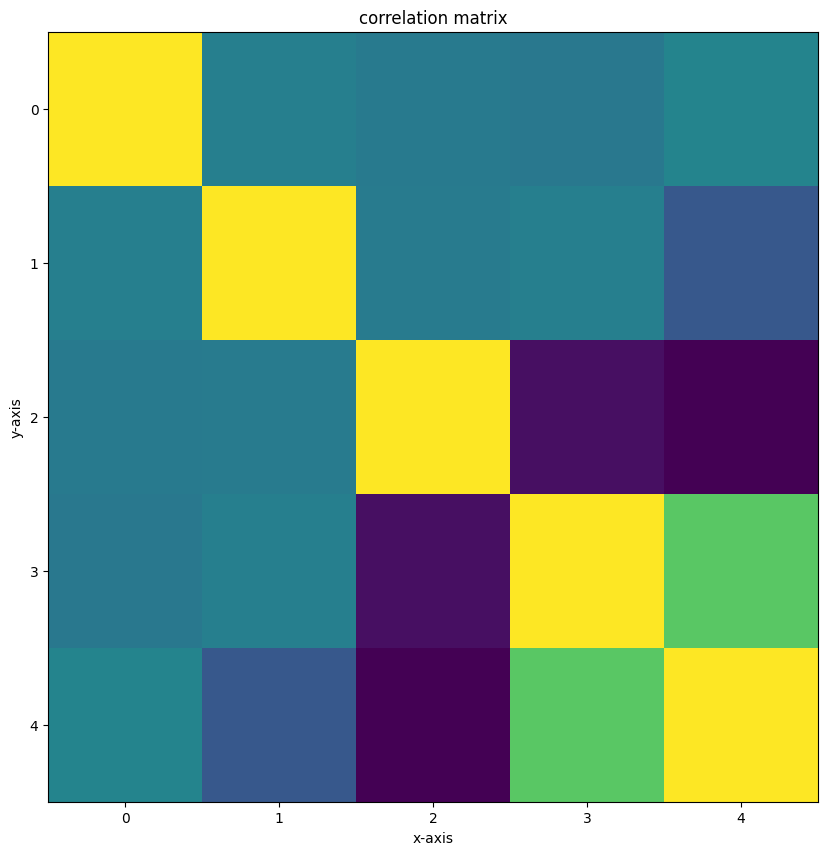

In [509]:
plt.figure(figsize=(10,10))
plt.imshow(df.corr())
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("correlation matrix")
plt.show()


**Linear Regression**

In [510]:

from sklearn.linear_model import LinearRegression


In [511]:
reg = LinearRegression()
reg.fit(xtrain, ytrain)
reg

LinearRegression()

In [512]:
y_predict = reg.predict(xtest)
y_predict

array([[39.22515681],
       [13.63277641],
       [41.49566913],
       [13.25686821],
       [41.78313927],
       [42.37108828],
       [43.19271855],
       [35.0982351 ],
       [49.23783099],
       [44.50349703],
       [48.66161722],
       [45.83504784],
       [38.72845801],
       [43.73974964],
       [46.32177005],
       [35.97117787],
       [42.2222724 ],
       [40.90630308],
       [41.63404093],
       [41.11743442],
       [50.50279745],
       [35.73606817],
       [34.23918005],
       [45.36088421],
       [44.73060227],
       [44.06665807],
       [47.41868185],
       [26.56038849],
       [47.60675786],
       [21.95606928],
       [48.3844778 ],
       [35.88960646],
       [41.58285754],
       [35.05884528],
       [44.14662233],
       [35.68347053],
       [47.67233507],
       [38.77744   ],
       [49.76492182],
       [ 3.0014106 ],
       [54.01092913],
       [31.14804025],
       [32.8821491 ],
       [47.97512856],
       [18.05335414],
       [48

In [513]:
reg.score(xtrain, ytrain)

0.5483035207983167

In [514]:
reg.score(xtest, ytest)

0.5516056549613849

**Polynomial**

In [515]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())


In [516]:
x.shape

(414, 4)

In [517]:
y.shape

(414, 1)

In [518]:

poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x)




In [524]:

pd.DataFrame(x_poly).shape
# pd.DataFrame(x_poly)


(414, 35)

In [525]:
xtrain_p, xtest_p, ytrain_p, ytest_p = train_test_split(x_poly, y, test_size=0.3, random_state=0)


In [526]:
ytrain_p.shape

(289, 1)

In [527]:

reg2 = LinearRegression()
reg2.fit(xtrain_p, ytrain_p)




LinearRegression()

In [528]:
xtrain_p.shape

(289, 35)

In [529]:
reg2.predict(xtrain_p)


array([[40.86555439],
       [57.22443175],
       [58.19467528],
       [21.65586749],
       [45.86428416],
       [40.04273676],
       [53.2827994 ],
       [54.84367902],
       [23.83496169],
       [30.01263011],
       [22.12907745],
       [39.80164716],
       [36.10960599],
       [43.73477145],
       [55.23926911],
       [43.89468717],
       [38.68606636],
       [46.14192067],
       [42.6888461 ],
       [40.85398328],
       [31.38812212],
       [52.29889078],
       [37.06856783],
       [44.88266651],
       [50.58587946],
       [43.67962757],
       [22.06212528],
       [40.30350745],
       [21.27922176],
       [50.48528788],
       [35.95823425],
       [40.91277194],
       [22.02934218],
       [13.1258691 ],
       [37.83968616],
       [43.84090987],
       [27.63639667],
       [26.90775545],
       [14.21491669],
       [43.81360326],
       [41.38036466],
       [39.04492659],
       [32.26265728],
       [39.48232506],
       [44.33313337],
       [42

In [530]:
y_predict2 = reg2.predict(xtest_p)
y_predict2

array([[43.40439535],
       [21.45505205],
       [42.06734504],
       [21.95194107],
       [48.23583329],
       [40.59902701],
       [45.06589771],
       [37.55651145],
       [49.16515237],
       [43.64933951],
       [48.12084578],
       [46.83429183],
       [42.42072352],
       [44.44456056],
       [48.94838327],
       [38.64187171],
       [38.46264424],
       [44.88266651],
       [41.63374484],
       [40.10523322],
       [54.93879493],
       [32.67250889],
       [29.89285168],
       [46.19711543],
       [46.25928389],
       [42.96050251],
       [41.84080605],
       [23.03092642],
       [49.76617279],
       [22.63941964],
       [51.90813215],
       [33.60651062],
       [45.72849577],
       [37.9240532 ],
       [41.57900187],
       [32.57652209],
       [46.29955483],
       [33.04895676],
       [54.08684985],
       [-0.94613047],
       [54.78086602],
       [33.80706033],
       [29.48625952],
       [46.32952538],
       [21.59976872],
       [49

In [364]:
xtest_p.shape

(125, 35)

In [531]:
reg2.score(xtrain_p, ytrain_p)

0.6458042996692501

In [532]:
reg2.score(xtest_p, ytest_p)

0.6398772619896045

In [533]:
pipeline.fit(x,y)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [534]:
pipeline.predict(x)
   

array([[46.93066065],
       [42.52561079],
       [41.54971884],
       [41.54971884],
       [47.03961507],
       [31.11056153],
       [34.51542779],
       [42.96751243],
       [20.29442713],
       [26.18955248],
       [38.05635685],
       [56.6424457 ],
       [40.3913405 ],
       [24.34845446],
       [33.08836476],
       [38.31625526],
       [53.88380869],
       [35.8828426 ],
       [43.01849303],
       [55.27531517],
       [27.65990579],
       [47.97825786],
       [26.63665962],
       [48.20962133],
       [43.62013008],
       [27.68736198],
       [48.26607803],
       [49.13311276],
       [39.36060302],
       [47.33850804],
       [19.59638619],
       [31.94616807],
       [31.90937884],
       [43.96286685],
       [43.42518855],
       [21.28011769],
       [25.67929648],
       [32.02746621],
       [45.07273621],
       [45.37535904],
       [21.37263623],
       [20.48961637],
       [40.16408935],
       [34.87276723],
       [48.99916678],
       [42

In [535]:
pipeline.predict(x)[1] #Predict from second row


array([42.52561079])

In [536]:
pipeline.score(x,y)

0.655771238007239

**Model Performance**

In [537]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [538]:
mse = mean_squared_error(y_predict, ytest)
mse


76.41725829919422

In [539]:
mse_poly = mean_squared_error(y_predict2, ytest_p)
mse_poly

61.37363817017697

**L1 Regularization**

In [540]:
from sklearn.linear_model import Lasso, Ridge

In [541]:
lasso_model = Lasso()
lasso_model.fit(xtrain, ytrain)

Lasso()

In [542]:
lasso_predictions = lasso_model.predict(xtest)
lasso_mse = mean_squared_error(ytest, lasso_predictions)


print(lasso_mse)


78.56402072588622


In [543]:
ridge_model = Ridge() 
ridge_model.fit(xtrain, ytrain)

Ridge()

In [544]:
ridge_predictions = ridge_model.predict(xtest)
ridge_mse = mean_squared_error(ytest, ridge_predictions)


print(ridge_mse)

76.39443324449304


In [545]:
lasso_score = lasso_model.score(xtest, ytest)
lasso_score

0.5390090746378506

In [546]:
ridge_score = ridge_model.score(xtest, ytest)
ridge_score

0.5517395857733637

**Visualization**

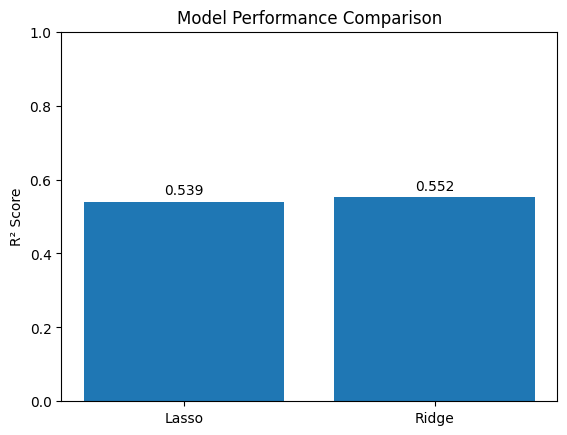

In [547]:
scores = [lasso_score, ridge_score]
models = ['Lasso', 'Ridge']

for i, score in enumerate(scores):
    plt.text(i, score+.02, f'{score:.3f}', ha='center')

plt.bar(models, scores)
plt.ylabel('R² Score')
plt.title('Model Performance Comparison')
plt.ylim(0, 1)
plt.show()